In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [3]:
latent_dim = 100
hidden_dim = 256
image_dim = 28 * 28
batch_size = 64
learning_rate = 0.0002
num_epochs = 50

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [5]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, image_dim),
            nn.Tanh()
        )
 
    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 1, 28, 28)
        return img

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_dim, hidden_dim),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
 
    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity

In [8]:
generator = Generator()
discriminator = Discriminator()

In [9]:
# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate)
 
# Loss function
adversarial_loss = nn.BCELoss()

In [11]:
for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(train_loader):
        valid = torch.ones(imgs.size(0), 1)
        fake = torch.zeros(imgs.size(0), 1)
 
        real_imgs = imgs
 
        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(imgs.size(0), latent_dim)
        gen_imgs = generator(z)
        g_loss = adversarial_loss(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()
 
        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real_imgs), valid)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()
 
    print(f'Epoch {epoch + 1}/{num_epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}')

Epoch 1/50, D Loss: 0.028547875583171844, G Loss: 3.2719016075134277
Epoch 2/50, D Loss: 0.14346584677696228, G Loss: 2.1492176055908203
Epoch 3/50, D Loss: 0.11877377331256866, G Loss: 2.7156593799591064
Epoch 4/50, D Loss: 0.06795138120651245, G Loss: 2.8079113960266113
Epoch 5/50, D Loss: 0.02546776458621025, G Loss: 4.8488335609436035
Epoch 6/50, D Loss: 0.02884427085518837, G Loss: 5.243170738220215
Epoch 7/50, D Loss: 0.052219294011592865, G Loss: 3.997072219848633
Epoch 8/50, D Loss: 0.11719417572021484, G Loss: 3.607974052429199
Epoch 9/50, D Loss: 0.06886287033557892, G Loss: 2.830116033554077
Epoch 10/50, D Loss: 0.02922547422349453, G Loss: 5.219596862792969
Epoch 11/50, D Loss: 0.26998233795166016, G Loss: 2.0939295291900635
Epoch 12/50, D Loss: 0.09281124919652939, G Loss: 3.8898913860321045
Epoch 13/50, D Loss: 0.04006495699286461, G Loss: 3.693467140197754
Epoch 14/50, D Loss: 0.10275638103485107, G Loss: 3.999345541000366
Epoch 15/50, D Loss: 0.026918619871139526, G Los

In [13]:
from matplotlib import pyplot as plt

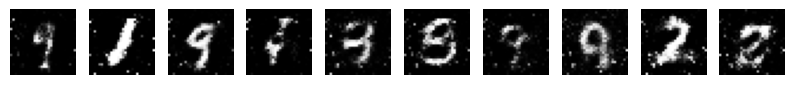

In [14]:
# Generate new images
def generate_images(generator, num_images, latent_dim):
    # Menentukan status generator menjadi evaluation mode
    generator.eval()
 
    # Generate random noise
    z = torch.randn(num_images, latent_dim)
 
    # Generate images from noise
    gen_imgs = generator(z)
 
    # Rescale images menjadi rentang [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5
 
    # Plot the generated images
    fig, axs = plt.subplots(1, num_images, figsize=(num_images, 1))
    for i in range(num_images):
        axs[i].imshow(gen_imgs[i].detach().numpy().squeeze(), cmap='gray')
        axs[i].axis('off')
    plt.show()
 
# Generate dan menampilkan 10 gambar baru
generate_images(generator, 10, latent_dim)